# Data Science: Decision Tree 
#### By: Javier Orduz
<!--
<img
src="https://jaorduz.github.io/images/Javier%20Orduz_01.jpg" width="50" align="center">
-->

[license-badge]: https://img.shields.io/badge/License-CC-orange
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[![CC License][license-badge]][license]  [![DS](https://img.shields.io/badge/downloads-DS-green)](https://github.com/Earlham-College/DS_Fall_2022)  [![Github](https://img.shields.io/badge/jaorduz-repos-blue)](https://github.com/jaorduz/)  ![Follow @jaorduc](https://img.shields.io/twitter/follow/jaorduc?label=follow&logo=twitter&logoColor=lkj&style=plastic)


## Objectives

*   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


# What is a decision Tree?

It is a basic and intuititve idea to map out all possible decision paths 
in the form a tree.

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


1. choose an attribute from our dataset.
2. Calculate the significance of the attribute in the splitting of the data.
3. split the data based on the value of the best attribute,
4. repeat it for the rest of the attributes.

After building this tree, you can use it to predict the <strong>class of unknown cases</strong>; or in our case,
the proper drug for a new patient based on his or her characteristics.

the choice of attribute to split data is very
important and it is all about purity of the leaves after the split.
A node in the tree is considered pure if in 100 percent of the cases,
the nodes fall into a specific category of the target field.
In fact, the method uses recursive partitioning to split
the training records into segments by minimizing the impurity at each step.
Impurity of nodes is calculated by entropy of data in the node.
So, what is entropy?
Entropy is the amount of information disorder or the amount of randomness in the data.
The entropy in the nod

# Entropy
Is the measurement of randomness or uncertainty.
In other words, 
Entropy is the amount of information disorder or the amount of randomness in the data.


The entropy in the node depends on how much random data is in that node and is calculated for each node.

In decision trees:  

- we're looking for trees that have the smallest entropy in their nodes.
- The entropy is used to calculate the homogeneity of the samples in that node.
- The samples are completely homogeneous,
- The entropy is zero and if the samples are equally divided it has an entropy of one.
This means if all the data in a node are either drug A or drug B,
then the entropy is zero,
but if half of the data are drug A and other half are B then the entropy is one.

You can easily calculate the entropy of a node using the frequency table of
the attribute through the entropy formula where
$P$ is for the proportion or ratio of a category,
such as drug A or B.



The lower the (Shannon) entropy, the less uniform the distribution, the purer the node.



$$
\text{Entropy} = -p(A)\log_2{p(A)}-p(B)\log_2{p(B)}
$$
where $p$ is the proportion or ratio of a category such as a drug A or B

$$
\text{Information gain}= \text{Entropy before the split}-\text{Entropy after the split}
$$

Example
$$
\text{Gain}(s, \text{Sex}) = 
0.940 - \Bigg[\frac{7}{14}0.985 + \frac{7}{14}0.592\Bigg]=0.151
$$

The atribute more suitable is such the tree with the higher information gained after splitting.

# To build a Tree

1. We must find the best atributte
1. After getting a branch, we will know if this atribute works to split the dataset with interesting outcome.
    - A node is pure if in $100\%$ of the cases the nodes fall into a specific category of the target field.
    - We use entropy as a grade of purity in nodes.
1. Use the metrics: Entropy and information gain.    

<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [14]:
df = pd.read_csv("../../data/drug200.csv")
df.shape

(200, 6)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>df</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [15]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using any method, function or class <!--**pandas.get_dummies()**-->
to convert the categorical variable into dummy/indicator variables.


In [16]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


In [17]:
y = df["Drug"]
y[0:5]

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [18]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [20]:
print('Shape of X training set {}'.format(X_trainset.shape))
print('Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5)
Size of Y training set (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [21]:
print('Shape of X test set {}'.format(X_testset.shape))
print('Size of Y test set {}'.format(y_testset.shape))

Shape of X test set (60, 5)
Size of Y test set (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [22]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

To show the default parameters

In [23]:
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [24]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [25]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [26]:
print (predTree [0:5])
print (y_testset [0:5])


['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     DrugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


/var/folders/qq/zf82ybms4gq_zwcb2b7wk18w0000gq/T/ipykernel_4819/2368946812.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (y_testset [0:5])


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [28]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
#!pip3 install pydotplus
#!pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


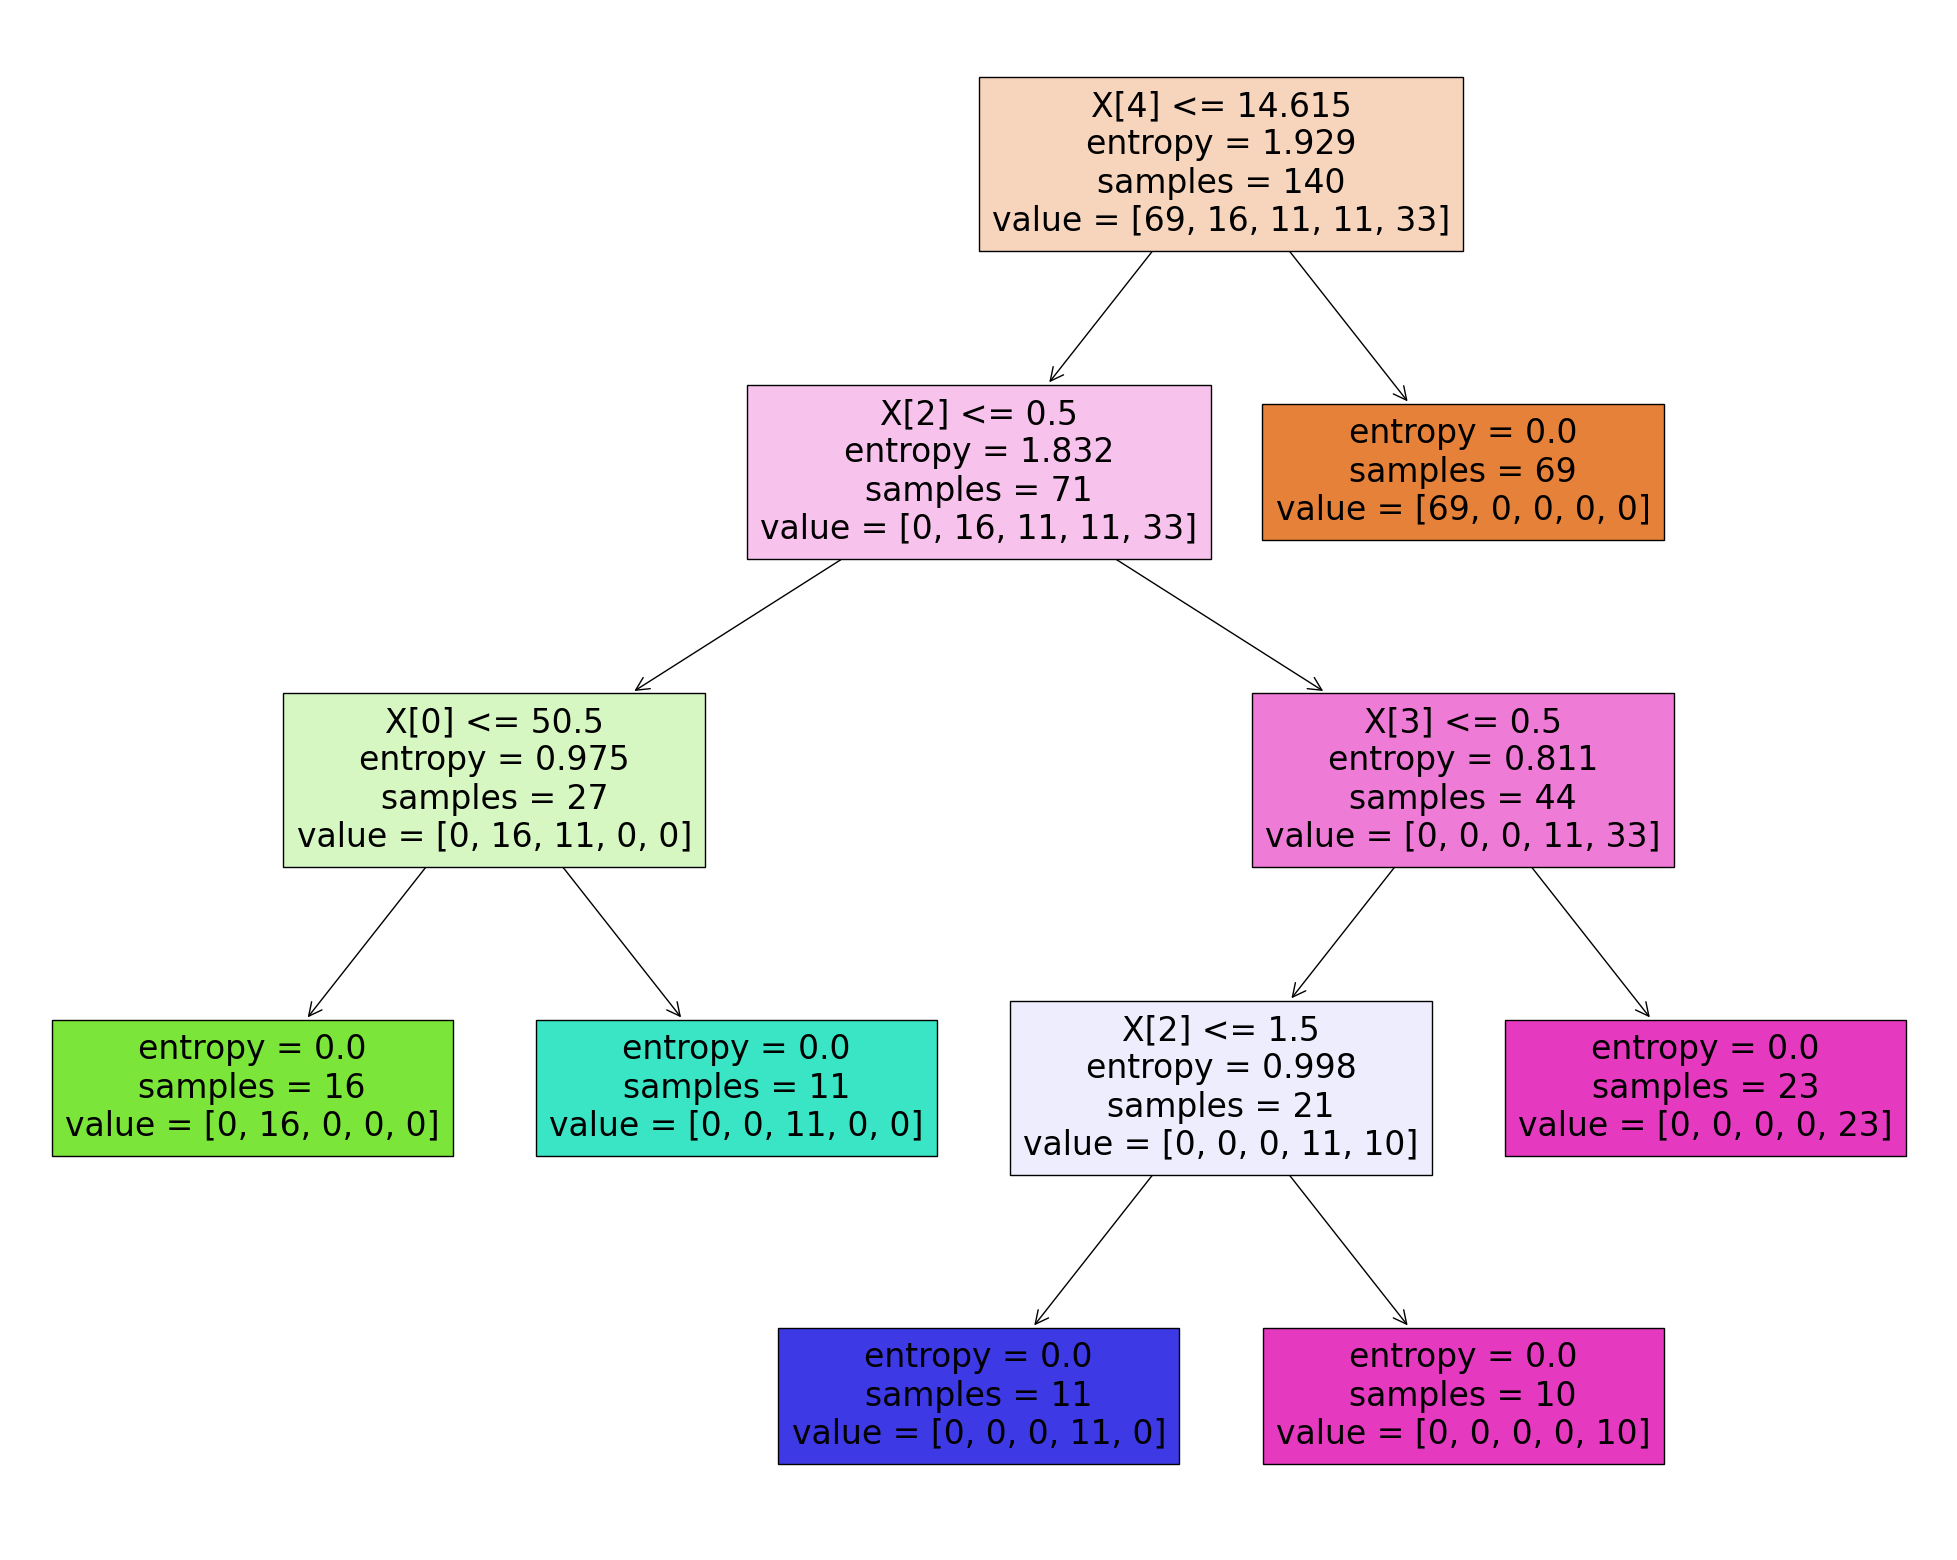

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(drugTree, filled=True)
#graph = graphviz.Source(dot_data, format="png") 
plt.show()

# Exercises

1. There some websites to download database:
    1. Find a database and download,
    1. Implement similar analysis, 
    1. and plot the tree.

1. Submmit your report in Moodle. Template https://www.overleaf.com/read/xqcnnnrsspcp

# References

[0] data https://tinyurl.com/2m3vr2xp

[1] numpy https://numpy.org/

[2] scipy https://docs.scipy.org/

[3] matplotlib https://matplotlib.org/

[4] matplotlib.cm https://matplotlib.org/stable/api/cm_api.html

[5] matplotlib.pyplot https://matplotlib.org/stable/api/pyplot_summary.html

[6] pandas https://pandas.pydata.org/docs/

[7] seaborn https://seaborn.pydata.org/

[8] Data Science: https://www.textbook.ds100.org/intro.html

[9] Jaccard https://tinyurl.com/27bboh2u

[10] IBM course. Author: Saeed Aghabzorgi. IBM lab skills. Watson Studio.